# Attempt at drawing the correlation coefficient heat map for the entire feature 

In [1]:
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import Imputer
import seaborn as sns


import numpy as np
import pandas as pd
import matplotlib.pylab as plt

'''Import the train and test data set'''
data_train = pd.read_csv('train.csv')

X = data_train.iloc[:, :291]
y = data_train.iloc[:, 291]

corrdata = data_train.iloc[:, 2:]
corrmatrix = corrdata.corr()

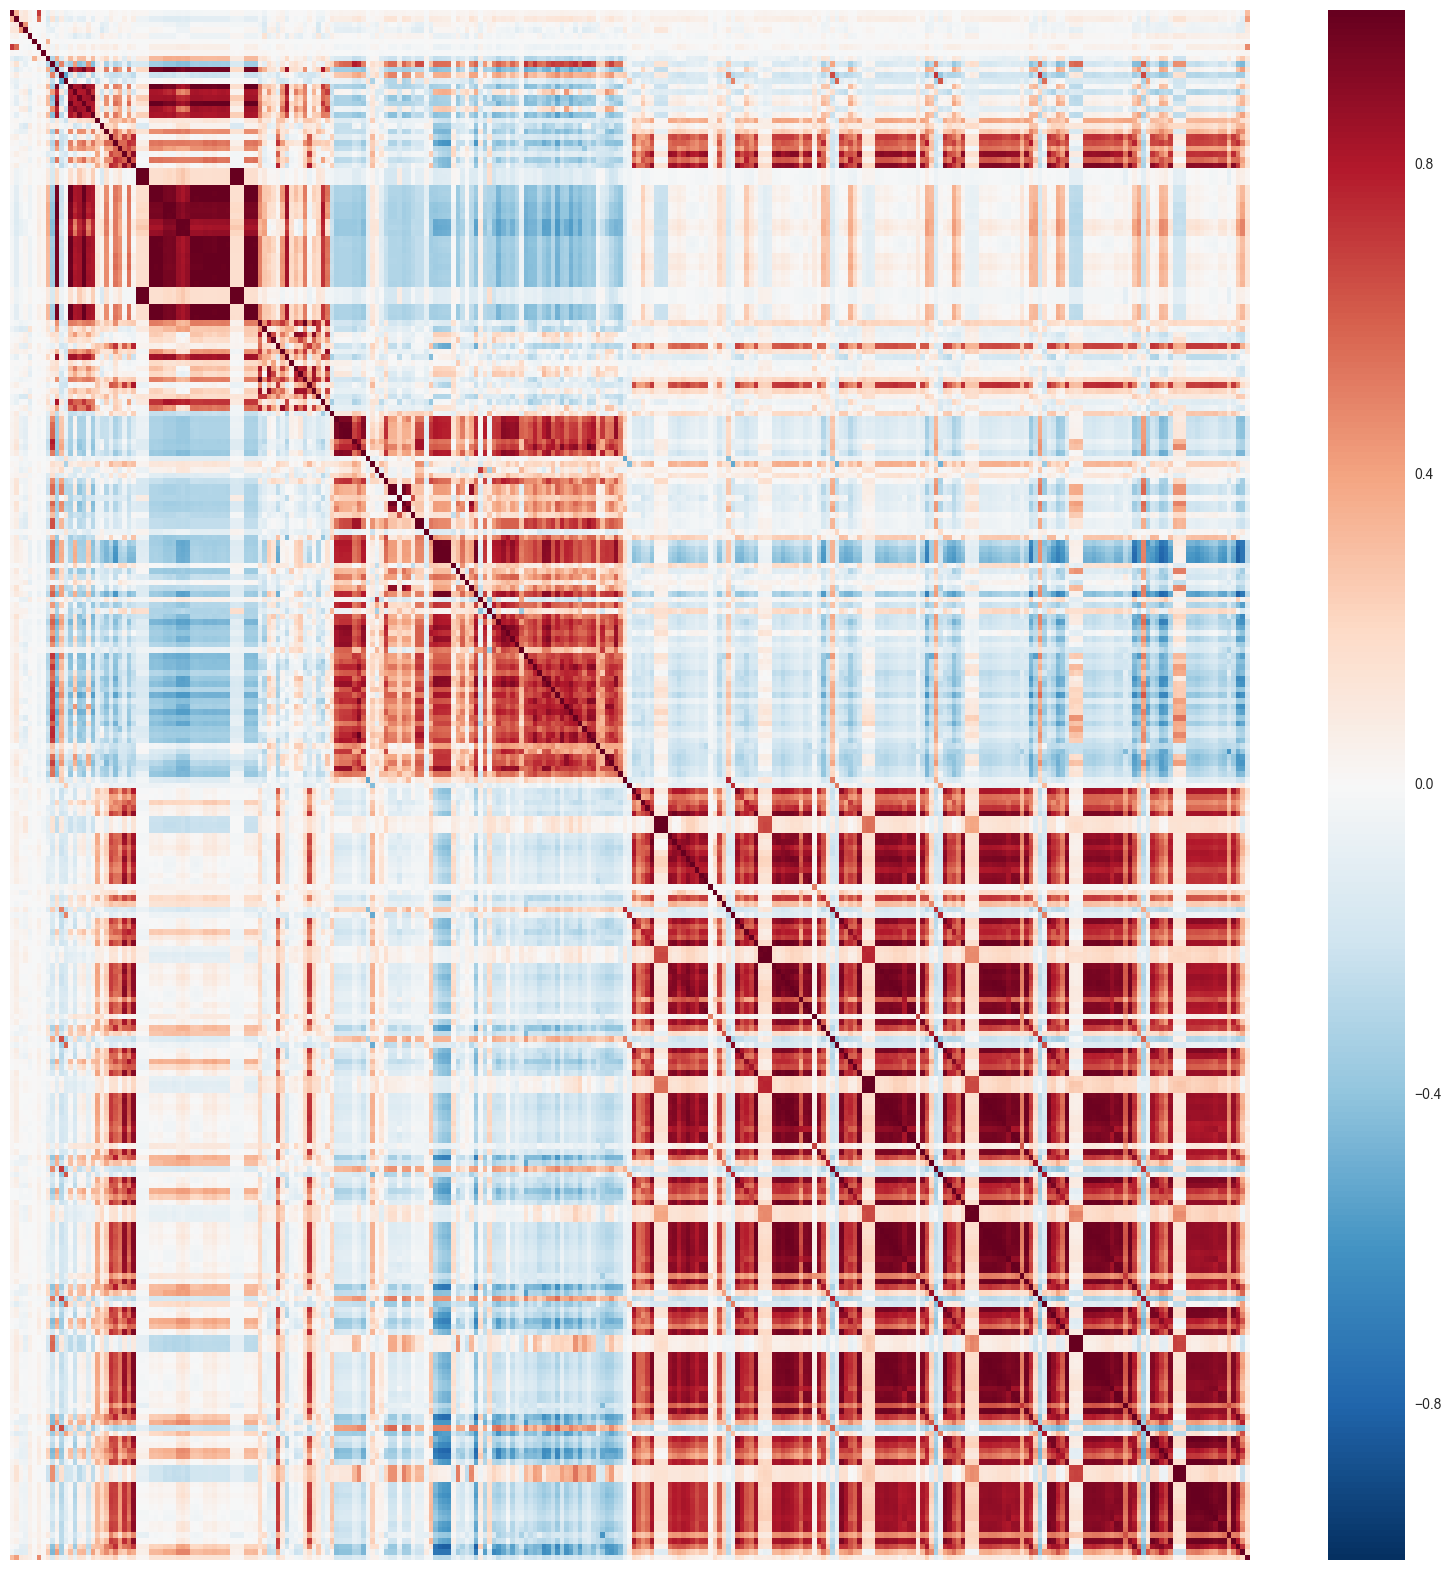

In [68]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix, xticklabels=False, yticklabels=False)
plt.show()

# some correlation coefficient calculations to show collinearity

### Below is correlation beteween distance and walking time to metro station via foot and automobile

In [105]:
temp_df = data_train[['metro_min_avto', 'metro_km_avto', 'metro_km_walk', 'metro_min_walk', 'price_doc']]
temp_corr = temp_df.corr()
temp_corr.head()

metro_min_avto  metro_km_avto  metro_km_walk  metro_min_walk  \
metro_min_avto        1.000000       0.944435       0.938782        0.938782   
metro_km_avto         0.944435       1.000000       0.986722        0.986722   
metro_km_walk         0.938782       0.986722       1.000000        1.000000   
metro_min_walk        0.938782       0.986722       1.000000        1.000000   
price_doc            -0.191054      -0.177329      -0.180889       -0.180889   

                price_doc  
metro_min_avto  -0.191054  
metro_km_avto   -0.177329  
metro_km_walk   -0.180889  
metro_min_walk  -0.180889  
price_doc        1.000000

#### Clearly, the four variables are highly correlated, and we have decided to pick metro_min_walk as the representative variable to be used (cite the paper).

In [106]:
temp_df = data_train[['railroad_station_avto_min', 'railroad_station_avto_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'price_doc']]
temp_corr = temp_df.corr()
temp_corr.head()

railroad_station_avto_min  \
railroad_station_avto_min                   1.000000   
railroad_station_avto_km                    0.900364   
railroad_station_walk_km                    0.882635   
railroad_station_walk_min                   0.882635   
price_doc                                  -0.137919   

                           railroad_station_avto_km  railroad_station_walk_km  \
railroad_station_avto_min                  0.900364                  0.882635   
railroad_station_avto_km                   1.000000                  0.966488   
railroad_station_walk_km                   0.966488                  1.000000   
railroad_station_walk_min                  0.966488                  1.000000   
price_doc                                 -0.130265                 -0.133119   

                           railroad_station_walk_min  price_doc  
railroad_station_avto_min                   0.882635  -0.137919  
railroad_station_avto_km                    0.966488  -0.130265  
railroad_station_walk_km                    1.000000  -0.133119  
railroad_station_walk_min                   1.000000  -0.133119  
price_doc                                  -0.133119   1.000000

#### Similar finding here; the correlation isn't as high as the metro case. However, the variables are still highly correlated, and, hence, we have decided to use railroad_station_walk_min as the representative variable.

In [111]:
#Need to do some preprocessing
mapping = {'yes': 1, 'no': 0}
temp_df_cul = data_train['culture_objects_top_25'].map(mapping)

temp_df = pd.concat([data_train['culture_objects_top_25_raion'], temp_df_cul], axis = 1)
temp_df = pd.concat([temp_df, data_train['price_doc']], axis = 1)
temp_corr = temp_df.corr()
temp_corr.head()

culture_objects_top_25_raion  \
culture_objects_top_25_raion                      1.000000   
culture_objects_top_25                            0.731858   
price_doc                                         0.040129   

                              culture_objects_top_25  price_doc  
culture_objects_top_25_raion                0.731858   0.040129  
culture_objects_top_25                      1.000000   0.152276  
price_doc                                   0.152276   1.000000

#### These two variables also showed fairly high correlation between them as expected

# Numerical approach to analyzing categorical values 

## 1) Raion Categorical Values

In [92]:
import statsmodels.api as sm

mapping = {'yes': 1, 'no': 0}
raion_list = ['thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 
            'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion']
temp_df_raion = pd.DataFrame()
for raion in raion_list:
    temp_df_raion[raion] = data_train[raion].map(mapping)
    
temp_df = pd.concat([data_train['price_doc'], temp_df_raion], axis = 1)
model_chas = sm.OLS.from_formula("price_doc ~ thermal_power_plant_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F  \
thermal_power_plant_raion      1.0  6.101264e+14  6.101264e+14  26.571404   
Residual                   21568.0  4.952394e+17  2.296177e+13        NaN   

                                 PR(>F)  
thermal_power_plant_raion  2.562159e-07  
Residual                            NaN

In [93]:
model_chas = sm.OLS.from_formula("price_doc ~ incineration_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq           F  \
incineration_raion      1.0  3.036659e+15  3.036659e+15  132.899651   
Residual            21568.0  4.928129e+17  2.284926e+13         NaN   

                          PR(>F)  
incineration_raion  1.169648e-30  
Residual                     NaN

In [94]:
model_chas = sm.OLS.from_formula("price_doc ~ oil_chemistry_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F    PR(>F)
oil_chemistry_raion      1.0  2.884041e+14  2.884041e+14  12.552031  0.000397
Residual             21568.0  4.955611e+17  2.297668e+13        NaN       NaN

In [95]:
model_chas = sm.OLS.from_formula("price_doc ~ thermal_power_plant_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F  \
thermal_power_plant_raion      1.0  6.101264e+14  6.101264e+14  26.571404   
Residual                   21568.0  4.952394e+17  2.296177e+13        NaN   

                                 PR(>F)  
thermal_power_plant_raion  2.562159e-07  
Residual                            NaN

In [96]:
model_chas = sm.OLS.from_formula("price_doc ~ radiation_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq           F        PR(>F)
radiation_raion      1.0  7.927131e+15  7.927131e+15  350.408927  1.422588e-77
Residual         21568.0  4.879224e+17  2.262252e+13         NaN           NaN

In [97]:
model_chas = sm.OLS.from_formula("price_doc ~ railroad_terminal_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F  \
railroad_terminal_raion      1.0  1.866073e+15  1.866073e+15  81.475319   
Residual                 21568.0  4.939835e+17  2.290354e+13        NaN   

                               PR(>F)  
railroad_terminal_raion  1.919807e-19  
Residual                          NaN

In [98]:
model_chas = sm.OLS.from_formula("price_doc ~ big_market_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq           F  \
big_market_raion      1.0  2.743141e+15  2.743141e+15  119.982348   
Residual          21568.0  4.931064e+17  2.286287e+13         NaN   

                        PR(>F)  
big_market_raion  7.557867e-28  
Residual                   NaN

In [99]:
model_chas = sm.OLS.from_formula("price_doc ~ nuclear_reactor_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F  \
nuclear_reactor_raion      1.0  2.365065e+14  2.365065e+14  10.292248   
Residual               21568.0  4.956130e+17  2.297909e+13        NaN   

                         PR(>F)  
nuclear_reactor_raion  0.001338  
Residual                    NaN

In [100]:
model_chas = sm.OLS.from_formula("price_doc ~ detention_facility_raion", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq         F  \
detention_facility_raion      1.0  5.660045e+14  5.660045e+14  24.64767   
Residual                  21568.0  4.952835e+17  2.296381e+13       NaN   

                                PR(>F)  
detention_facility_raion  6.935290e-07  
Residual                           NaN

## 2) Line1 categorical values

In [102]:
mapping = {'yes': 1, 'no': 0}
raion_list = ['water_1line', 'big_road1_1line', 'railroad_1line']
temp_df_raion = pd.DataFrame()
for raion in raion_list:
    temp_df_raion[raion] = data_train[raion].map(mapping)
    
temp_df = pd.concat([data_train[['price_doc']], temp_df_raion], axis = 1)

model_chas = sm.OLS.from_formula("price_doc ~ water_1line", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F        PR(>F)
water_1line      1.0  7.237286e+14  7.237286e+14  31.526083  1.992006e-08
Residual     21568.0  4.951258e+17  2.295650e+13        NaN           NaN

In [103]:
model_chas = sm.OLS.from_formula("price_doc ~ big_road1_1line", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq           F        PR(>F)
big_road1_1line      1.0  2.528404e+15  2.528404e+15  110.541826  8.607752e-26
Residual         21568.0  4.933211e+17  2.287283e+13         NaN           NaN

In [104]:
model_chas = sm.OLS.from_formula("price_doc ~ railroad_1line", data=temp_df)
sm.stats.anova_lm(model_chas.fit())

df        sum_sq       mean_sq          F    PR(>F)
railroad_1line      1.0  2.991545e+14  2.991545e+14  13.020198  0.000309
Residual        21568.0  4.955504e+17  2.297619e+13        NaN       NaN

# Correlation between different age groups

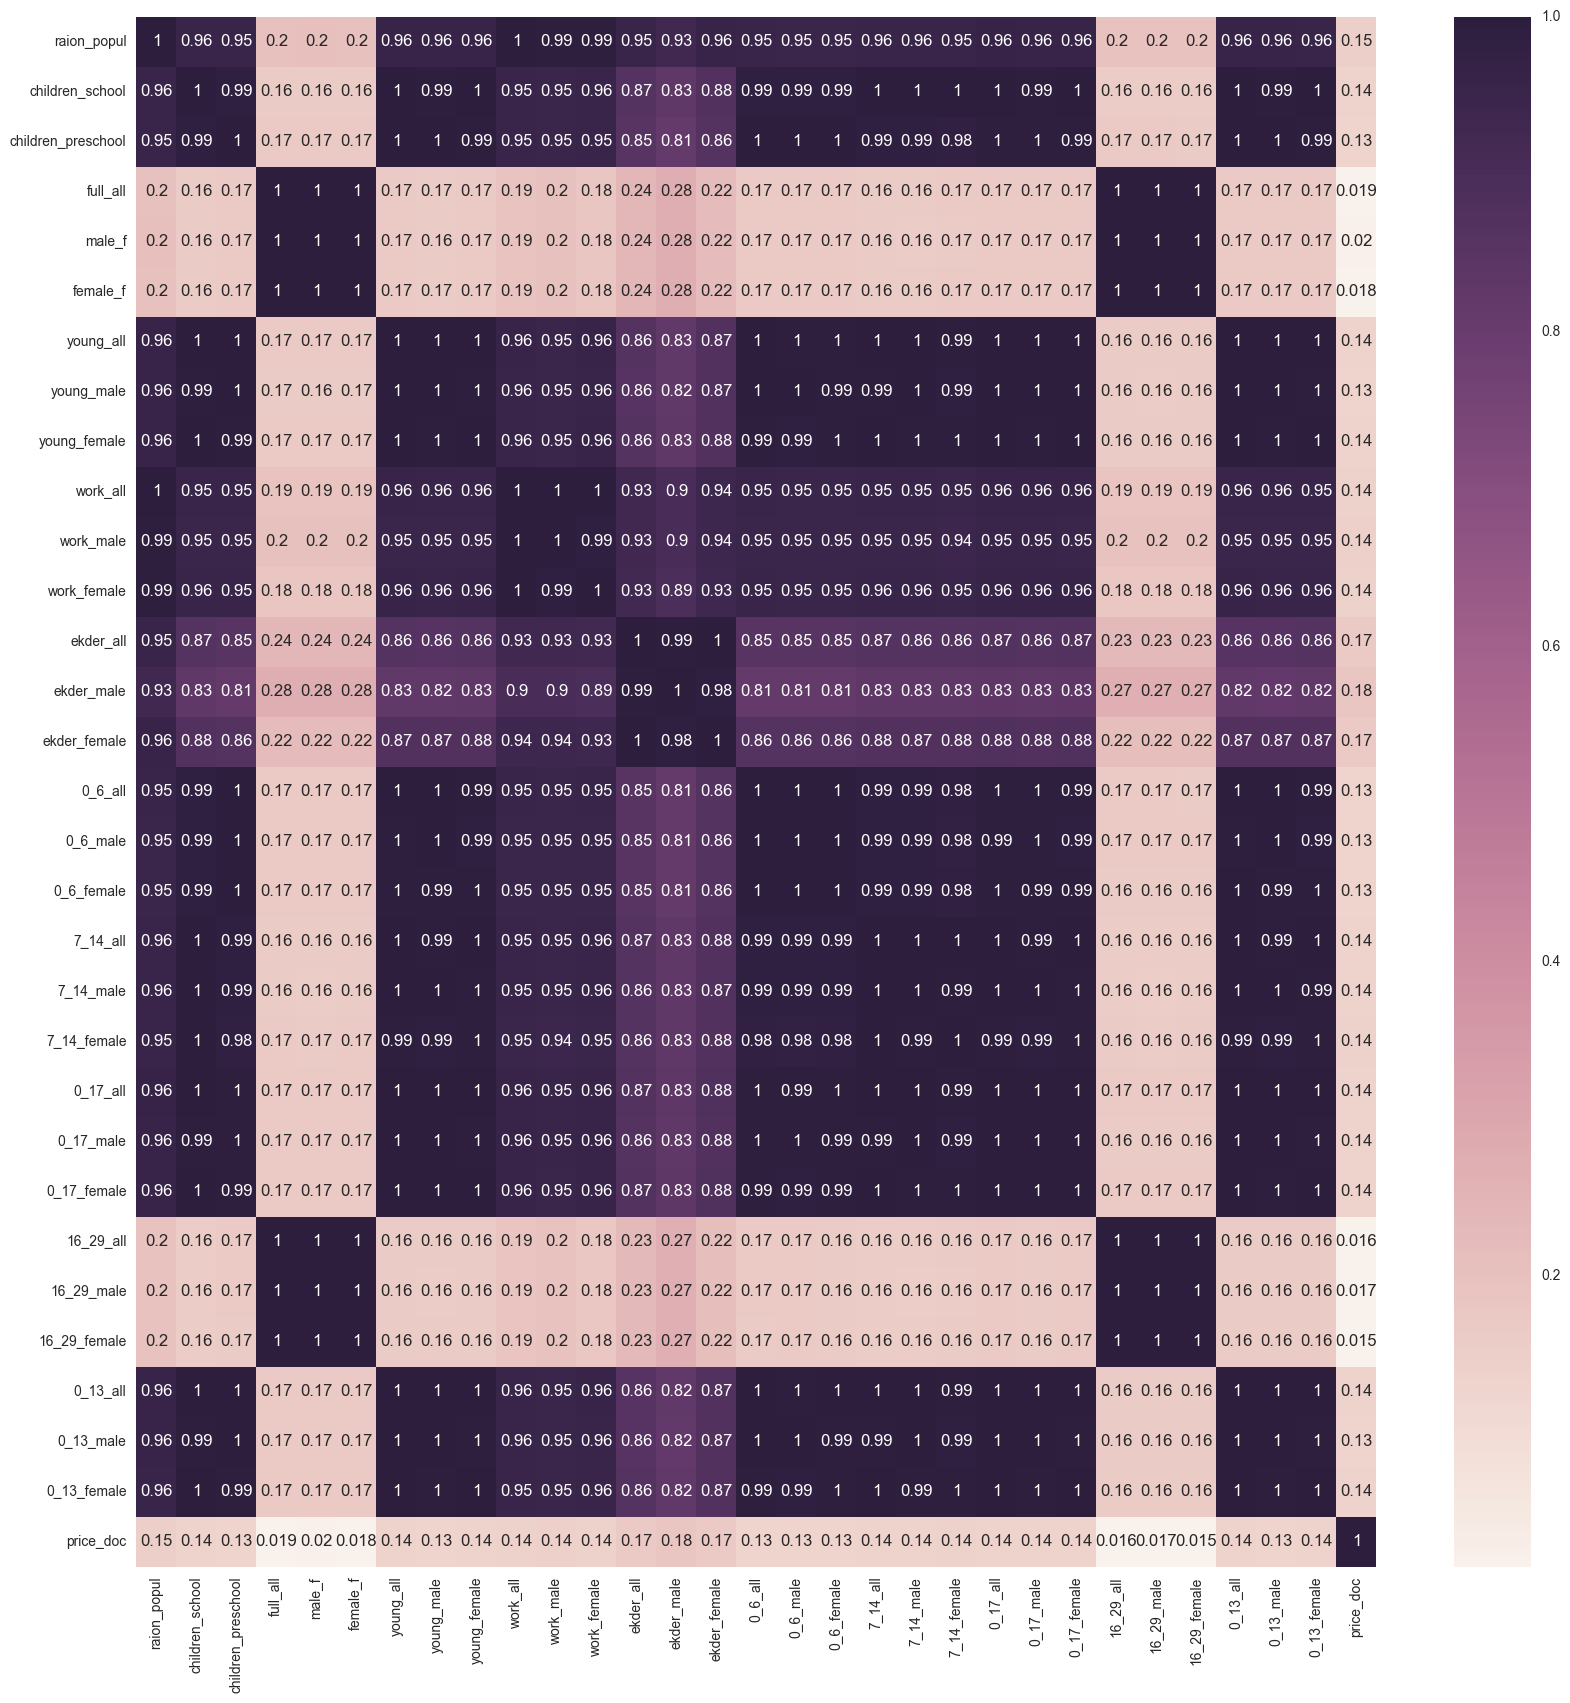

In [3]:
#Apparently raion_popul and full_all are same statistic collected by different sources
temp_df = data_train[['raion_popul', 'children_school', 'children_preschool', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female',
                      'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', 
                      '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all',
                      '0_13_male', '0_13_female', 'price_doc']]
temp_corr = temp_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(temp_corr, annot = True)
plt.show()

In [118]:
temp_corr.head(27)

children_school  children_preschool  full_all    male_f  \
children_school            1.000000            0.986899  0.163889  0.163592   
children_preschool         0.986899            1.000000  0.167618  0.167480   
full_all                   0.163889            0.167618  1.000000  0.999787   
male_f                     0.163592            0.167480  0.999787  1.000000   
female_f                   0.164083            0.167677  0.999849  0.999276   
young_all                  0.997006            0.996352  0.165686  0.165479   
young_male                 0.994935            0.996537  0.165006  0.164865   
young_female               0.997190            0.994139  0.166071  0.165793   
work_all                   0.954124            0.953980  0.194148  0.194376   
work_male                  0.947715            0.948864  0.203287  0.203636   
work_female                0.955667            0.954210  0.183849  0.183952   
ekder_all                  0.865002            0.851823  0.238924  0.239119   
ekder_male                 0.830012            0.814392  0.276958  0.276980   
ekder_female               0.876524            0.864494  0.220851  0.221122   
0_6_all                    0.986899            1.000000  0.167618  0.167480   
0_6_male                   0.985102            0.999182  0.168493  0.168397   
0_6_female                 0.987035            0.999067  0.166362  0.166179   
7_14_all                   1.000000            0.986899  0.163889  0.163592   
7_14_male                  0.998460            0.988780  0.161765  0.161556   
7_14_female                0.998275            0.981598  0.165565  0.165175   
0_17_all                   0.996814            0.995809  0.169941  0.169804   
0_17_male                  0.994642            0.995837  0.167604  0.167510   
0_17_female                0.997233            0.993894  0.172091  0.171910   
16_29_all                  0.160273            0.165509  0.999372  0.999188   
16_29_male                 0.159552            0.165605  0.998918  0.999218   
16_29_female               0.160813            0.165275  0.998961  0.998322   
0_13_all                   0.996559            0.996818  0.166648  0.166419   

                    female_f  young_all  young_male  young_female  work_all  \
children_school     0.164083   0.997006    0.994935      0.997190  0.954124   
children_preschool  0.167677   0.996352    0.996537      0.994139  0.953980   
full_all            0.999849   0.165686    0.165006      0.166071  0.194148   
male_f              0.999276   0.165479    0.164865      0.165793  0.194376   
female_f            1.000000   0.165804    0.165068      0.166248  0.193890   
young_all           0.165804   1.000000    0.999078      0.998957  0.957783   
young_male          0.165068   0.999078    1.000000      0.996075  0.957528   
young_female        0.166248   0.998957    0.996075      1.000000  0.956113   
work_all            0.193890   0.957783    0.957528      0.956113  1.000000   
work_male           0.202923   0.952008    0.952552      0.949500  0.997458   
work_female         0.183699   0.958662    0.957597      0.957853  0.997375   
ekder_all           0.238678   0.862735    0.860268      0.863609  0.930674   
ekder_male          0.276846   0.826571    0.824363      0.827241  0.901256   
ekder_female        0.220546   0.874791    0.872220      0.875750  0.939403   
0_6_all             0.167677   0.996352    0.996537      0.994139  0.953980   
0_6_male            0.168516   0.995044    0.996711      0.991258  0.953681   
0_6_female          0.166458   0.995948    0.994550      0.995419  0.952566   
7_14_all            0.164083   0.997006    0.994935      0.997190  0.954124   
7_14_male           0.161885   0.997226    0.997380      0.995044  0.954861   
7_14_female         0.165837   0.993428    0.989010      0.996116  0.950132   
0_17_all            0.169997   0.999712    0.998983      0.998465  0.960025   
0_17_male           0.167626   0.998661    0.999687      0.995548  0.

### As you can see on the heatmap, some population data are fairly highly correlated while others are not. Actually, the correlation between female and male of the same population category are extremely high. Perhaps we could just use the entire population?

### Another thing is there are high correlation between population categories who are in similar class; for instance, there's a high corrleation between young population and populations b/t 0-6, 7-14, 0-13. So we could also probably just pick one representative variable.

# Finally let me get the correlation factor for last sets of variables

In [52]:
temp_df = X.iloc[:, 153:]
temp_corr = temp_df.corr()

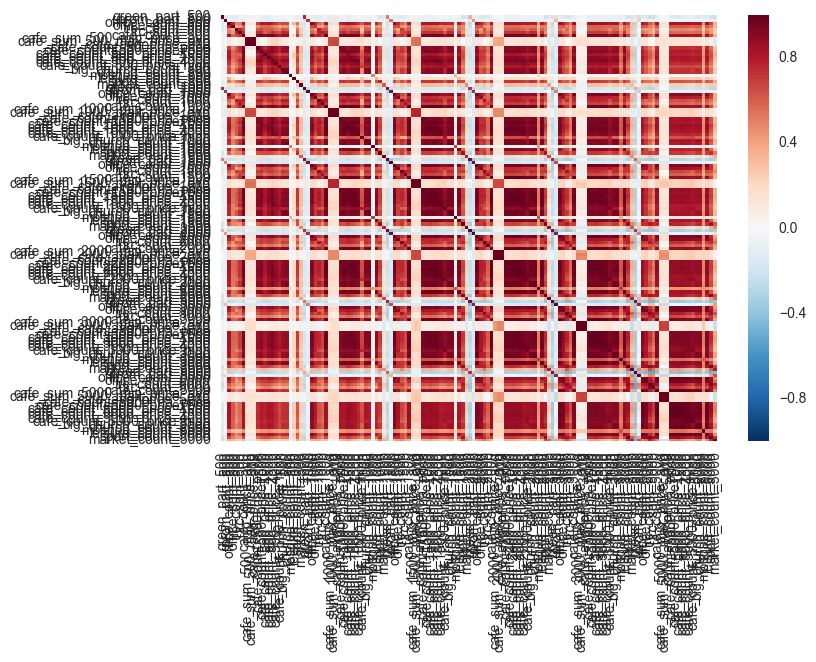

In [53]:
sns.heatmap(temp_corr)
plt.show()

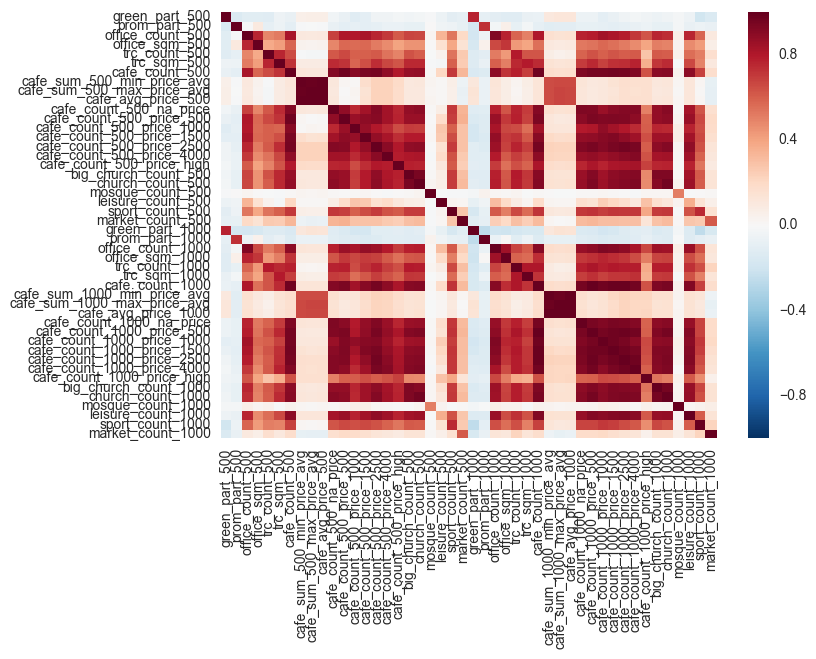

In [54]:
temp_df = X.iloc[:, 153:199]
temp_corr = temp_df.corr()
sns.heatmap(temp_corr)
plt.show()

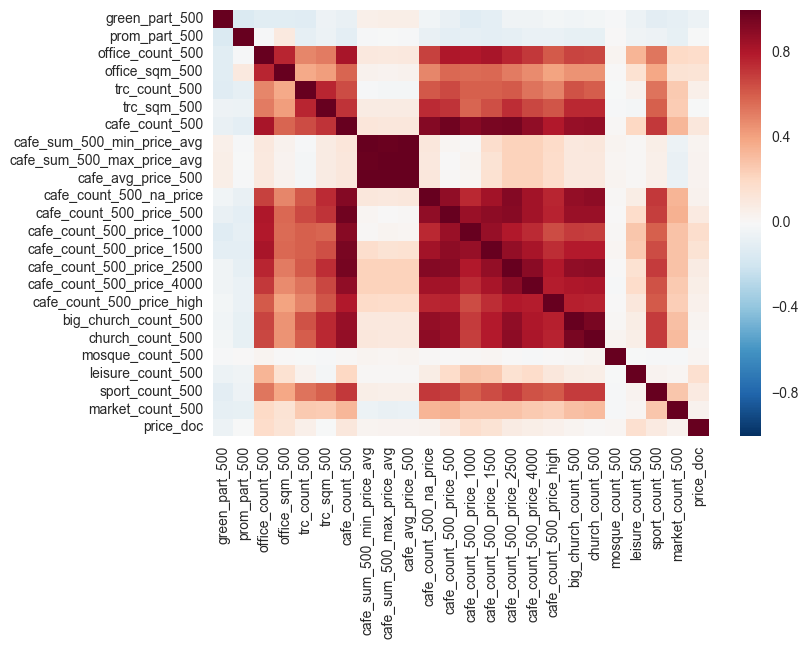

In [119]:
temp_df = X.iloc[:, 153:176]
temp_df = pd.concat([temp_df, data_train['price_doc']], axis = 1)
temp_corr = temp_df.corr()
sns.heatmap(temp_corr)
plt.show()

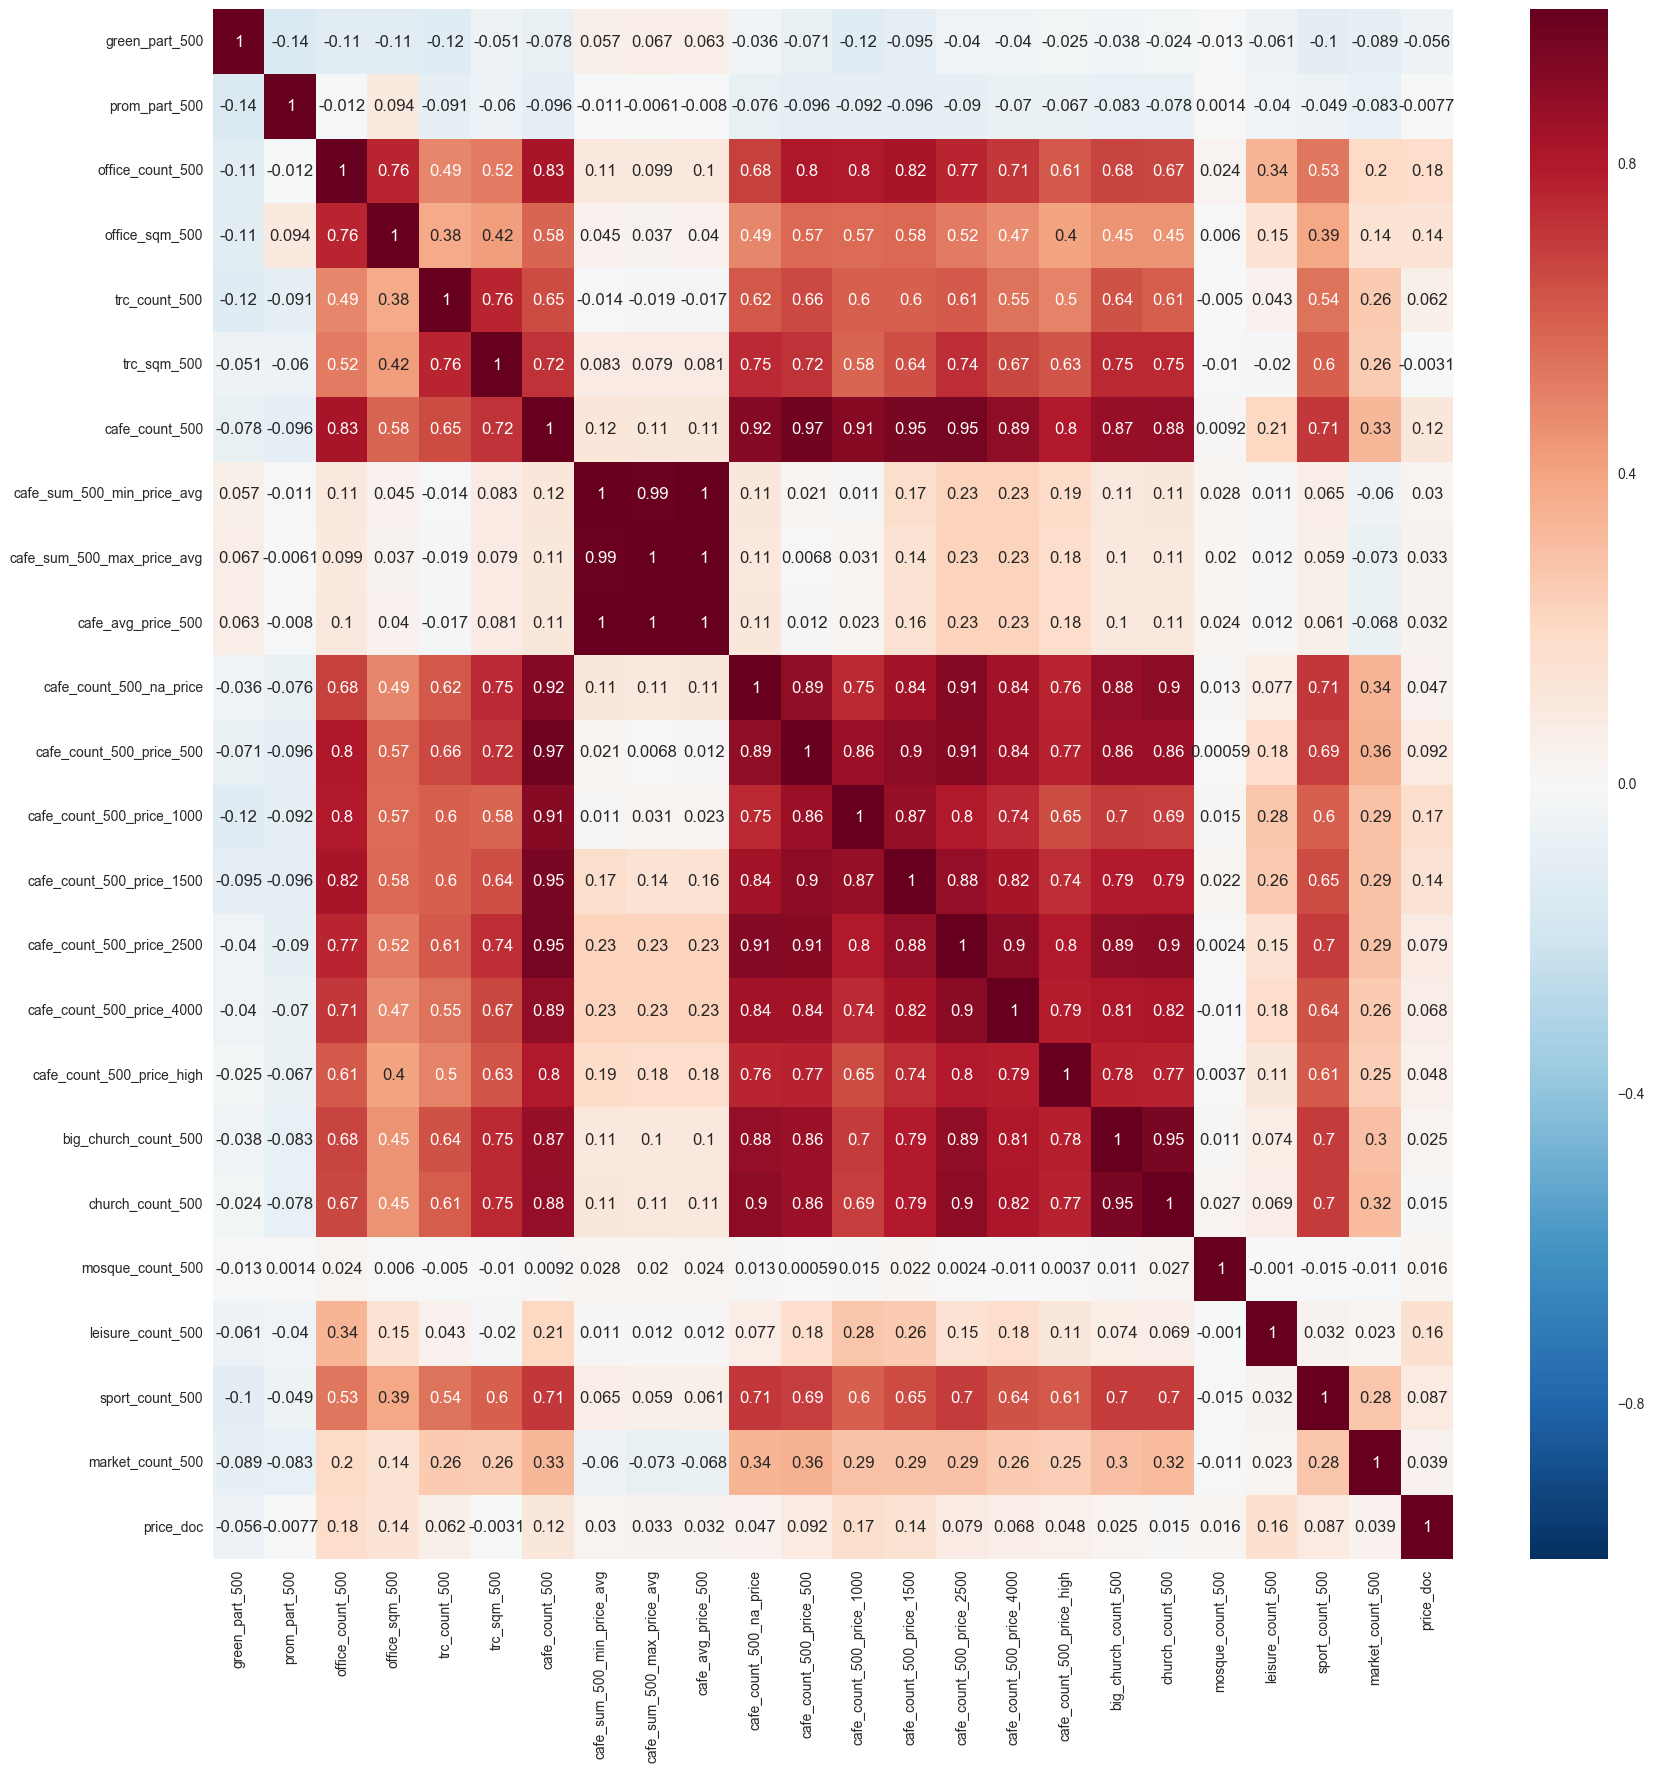

In [121]:
temp_df = X.iloc[:, 153:176]
temp_df = pd.concat([temp_df, data_train['price_doc']], axis = 1)
temp_corr = temp_df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(temp_corr, annot = True)
plt.show()

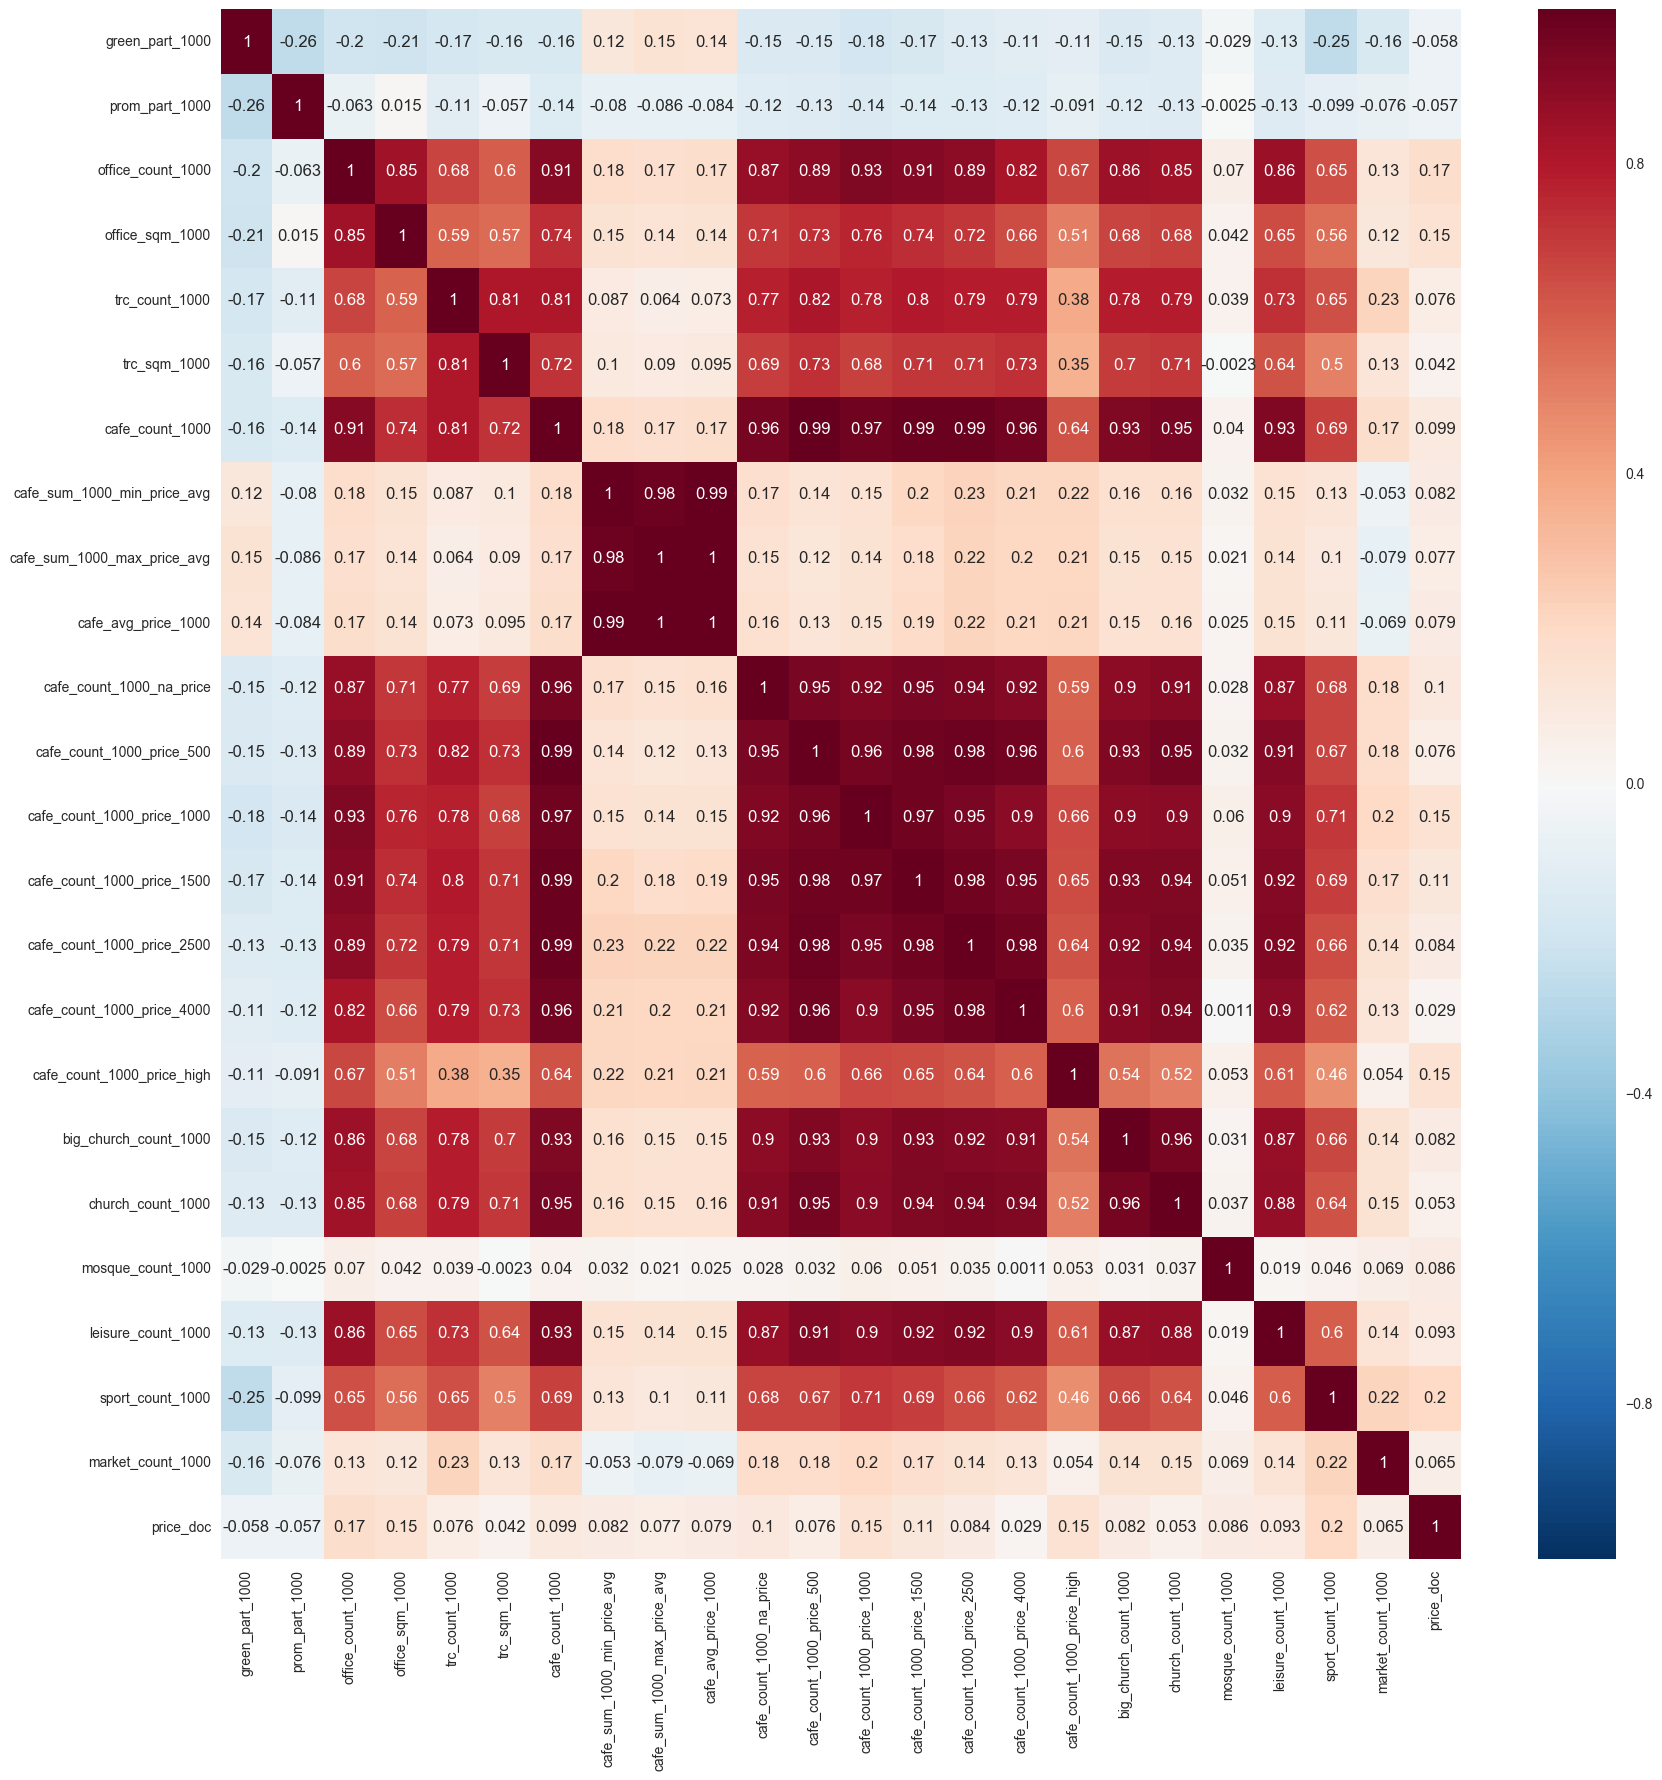

In [122]:
temp_df = X.iloc[:, 176:199]
temp_df = pd.concat([temp_df, data_train['price_doc']], axis = 1)
temp_corr = temp_df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(temp_corr, annot = True)
plt.show()

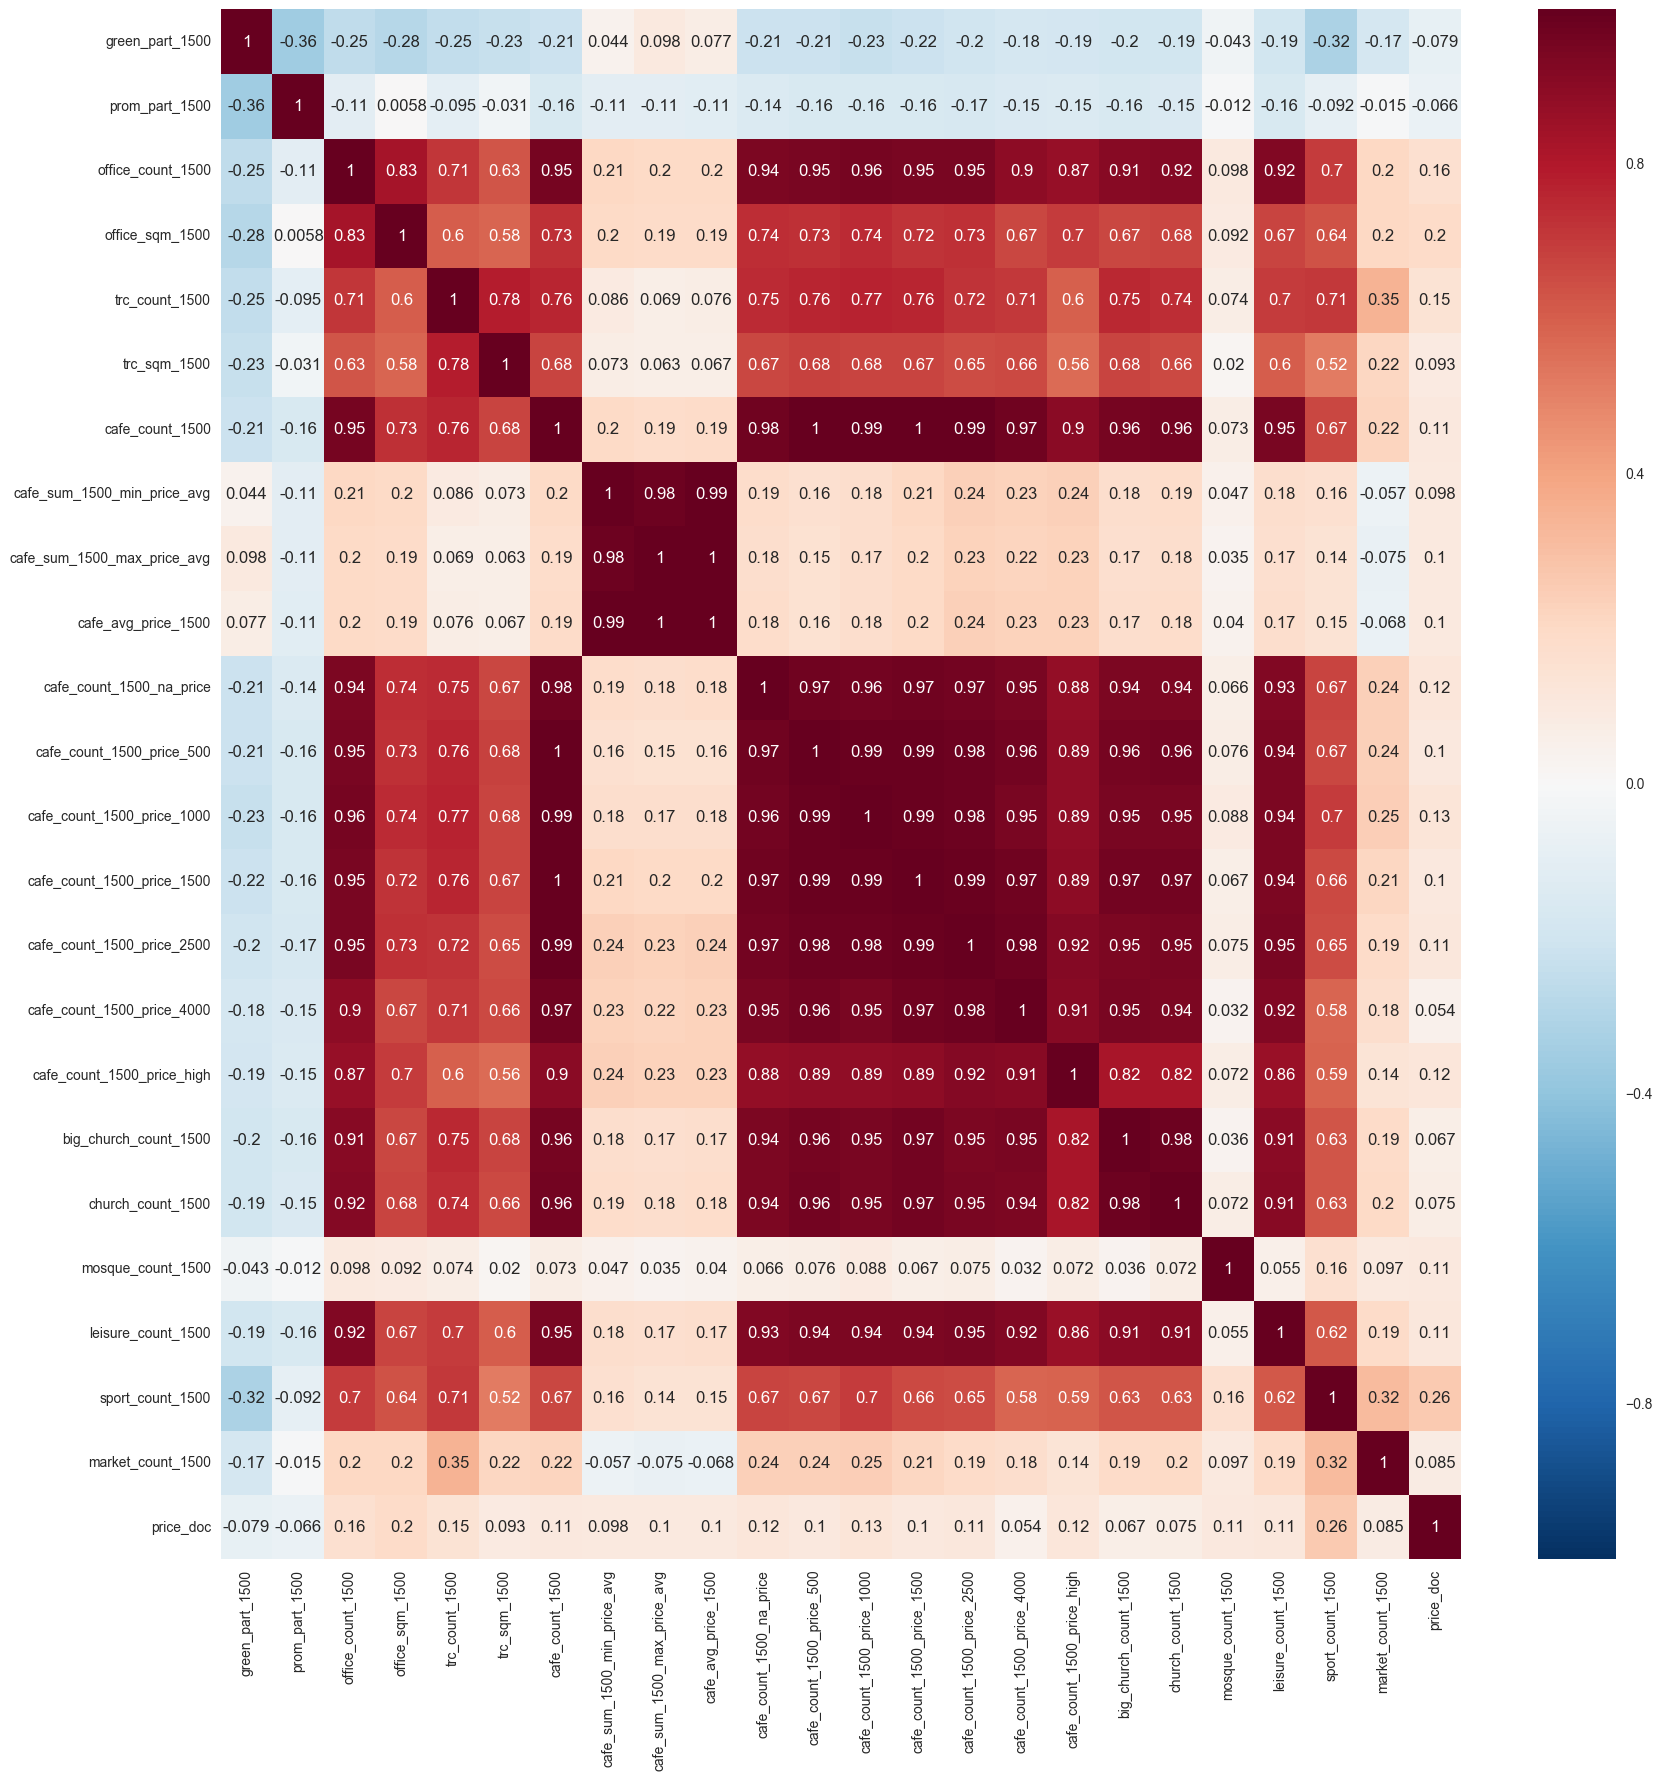

In [123]:
temp_df = X.iloc[:, 199:222]
temp_df = pd.concat([temp_df, data_train['price_doc']], axis = 1)
temp_corr = temp_df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(temp_corr, annot = True)
plt.show()

### Within the same distance metric, some of the variables are highly correlated. This pattern exists even between different distance metrics although not as strongly. We could probably get rid of some of the values.

# Other extraneous correlation coefficients

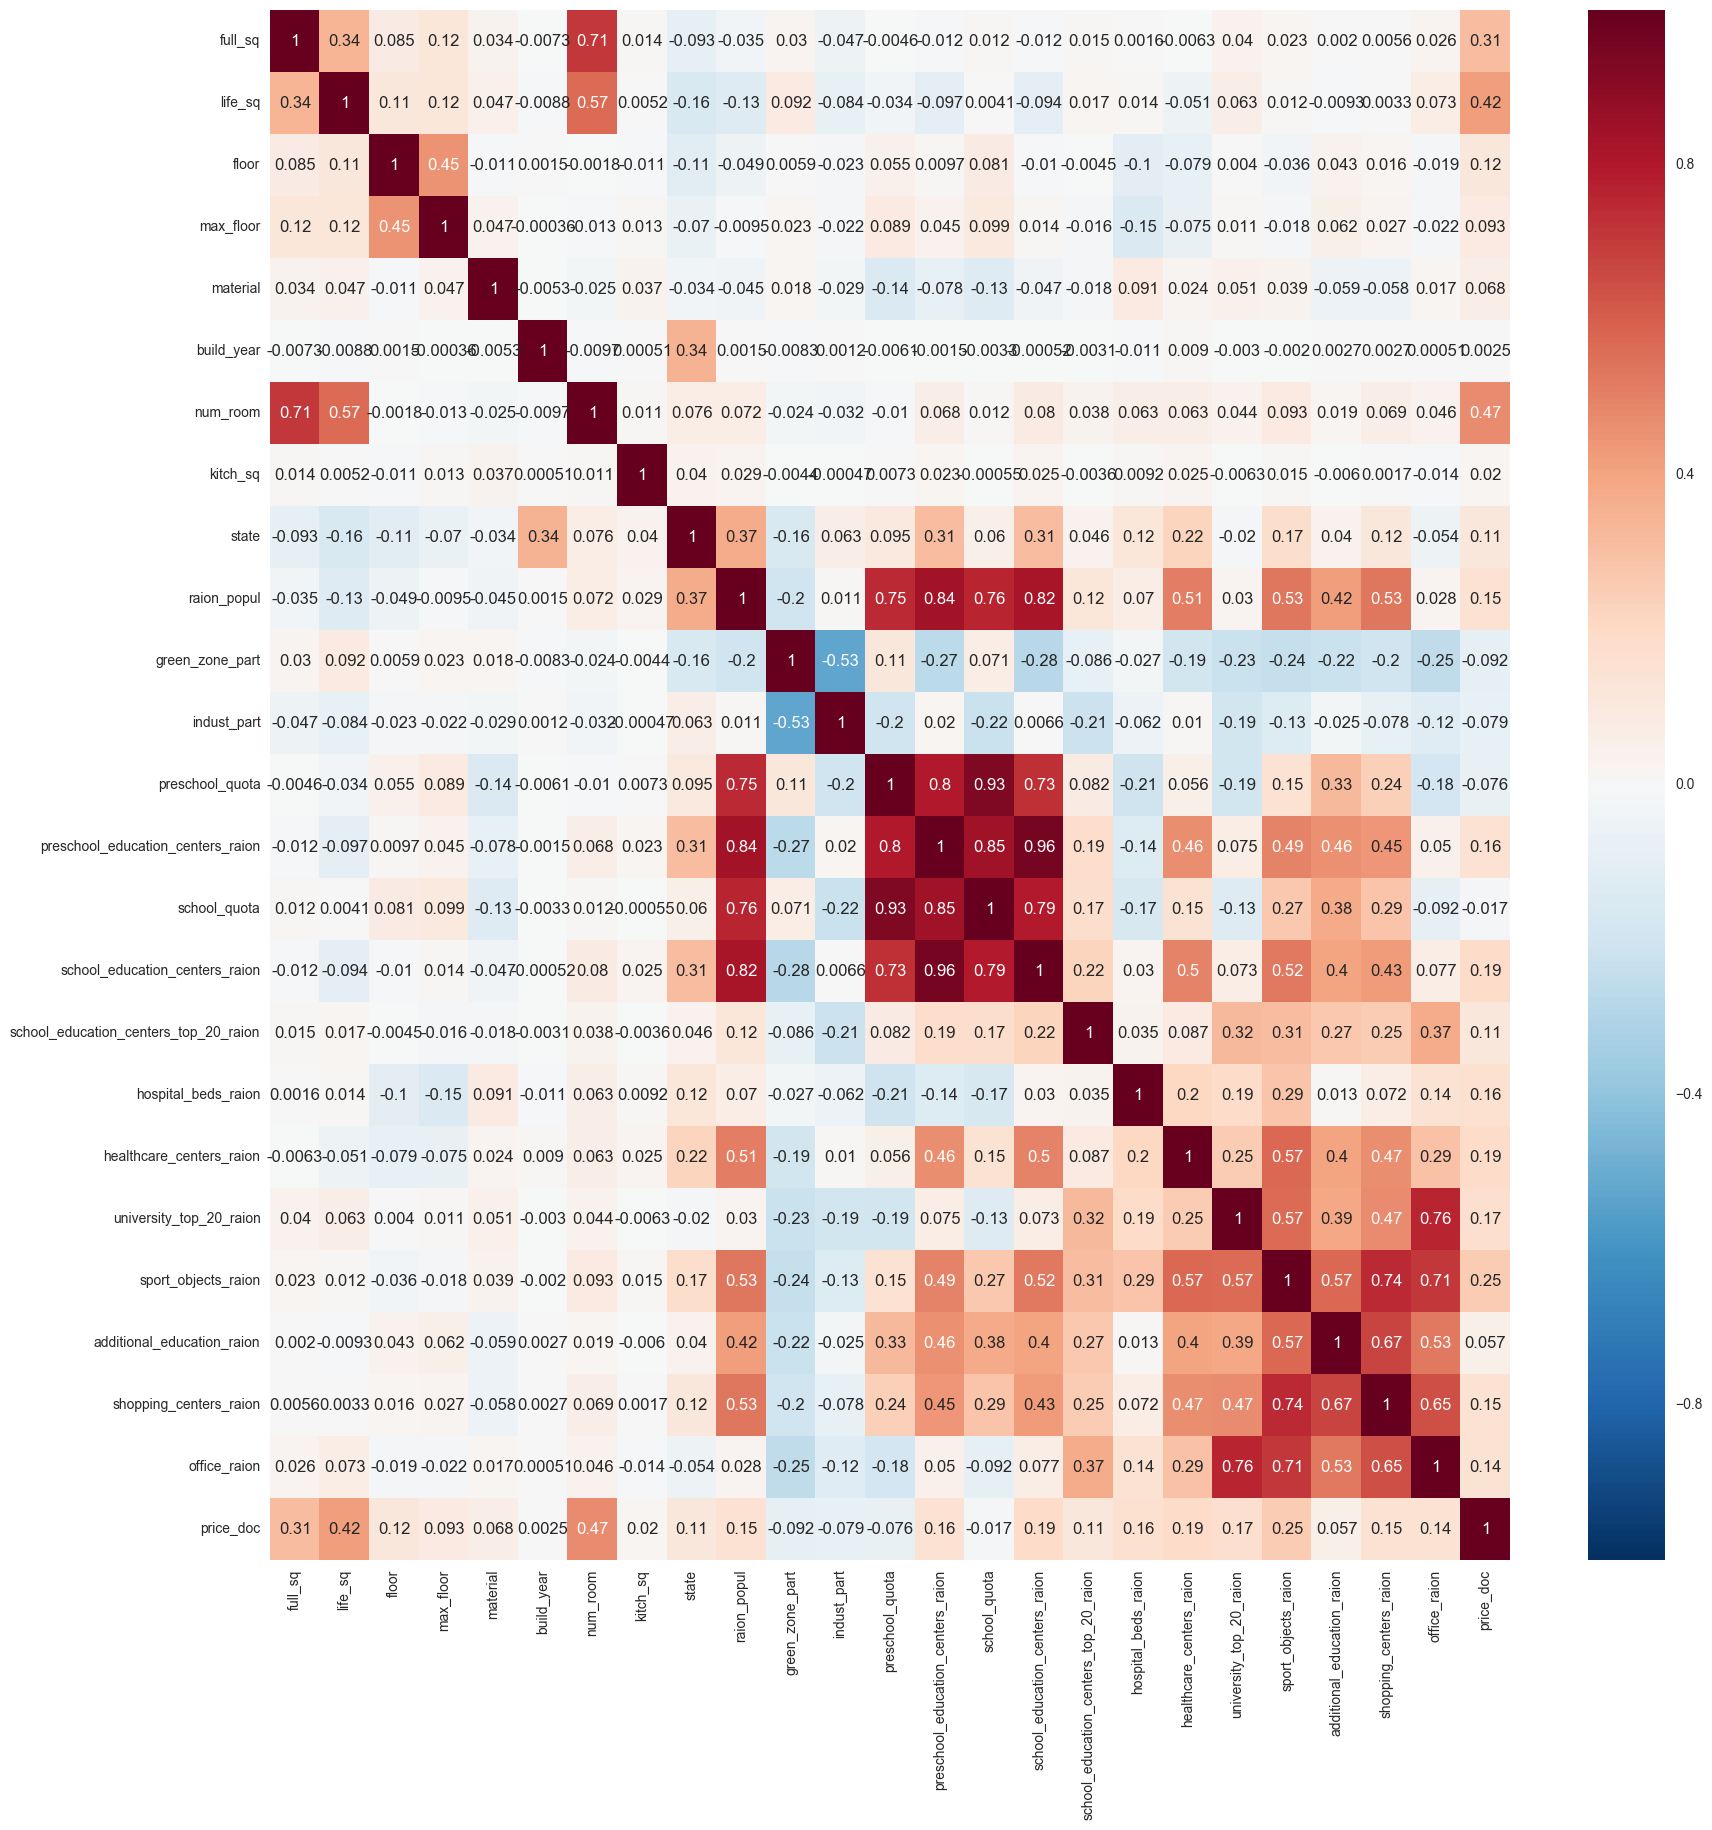

In [125]:
temp_df = data_train[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
                      'state', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_quota', 'preschool_education_centers_raion',
                      'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                      'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion',
                      'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'price_doc']]
temp_corr = temp_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(temp_corr, annot = True)
plt.show()